In [1]:
# Import Require Library:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load Dataset:
data = {
    'Hours_Studied': [2, 4, 6, 8, 10, 12, 14, 16],
    'Marks': [35, 45, 55, 65, 75, 85, 90, 95]
}

df = pd.DataFrame(data)
df

,Hours_Studied,Marks
0,2,35
1,4,45
2,6,55
3,8,65
4,10,75
5,12,85
6,14,90
7,16,95


In [3]:
# Basic Data Understandung:
df.head()

,Hours_Studied,Marks
0,2,35
1,4,45
2,6,55
3,8,65
4,10,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Hours_Studied  8 non-null      int64
 1   Marks          8 non-null      int64
dtypes: int64(2)
memory usage: 260.0 bytes


In [5]:
df.describe()


,Hours_Studied,Marks
count,8.000000,8.00000
mean,9.000000,68.12500
std,4.898979,21.86607
min,2.000000,35.00000
25%,5.500000,52.50000
50%,9.000000,70.00000
75%,12.500000,86.25000
max,16.000000,95.00000


### Correlation Analysis:

In [6]:
# Pearson correlation - coefficient:
corr_value, p_value = pearsonr(df['Hours_Studied'], df['Marks'])

print("Correlation Coefficient:", corr_value)
print("P-value:", p_value)

Correlation Coefficient: 0.9935320596198736
P-value: 6.731764302808375e-07


In [7]:
# Correlation Matrix
df.corr()

,Hours_Studied,Marks
Hours_Studied,1.000000,0.993532
Marks,0.993532,1.000000


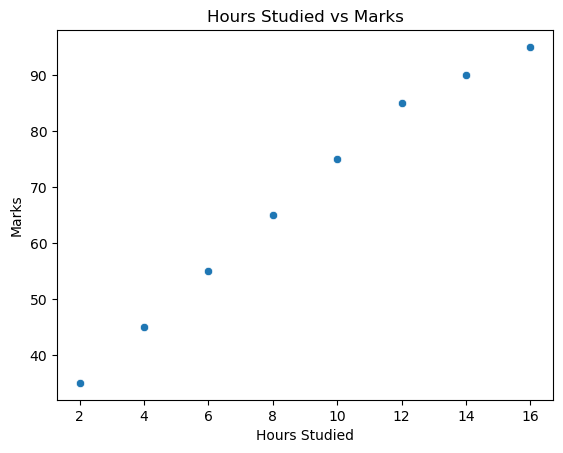

In [8]:
# Data Visualization (Correlation)
plt.figure()
sns.scatterplot(x='Hours_Studied', y='Marks', data=df)
plt.title("Hours Studied vs Marks")
plt.xlabel("Hours Studied")
plt.ylabel("Marks")
plt.show()

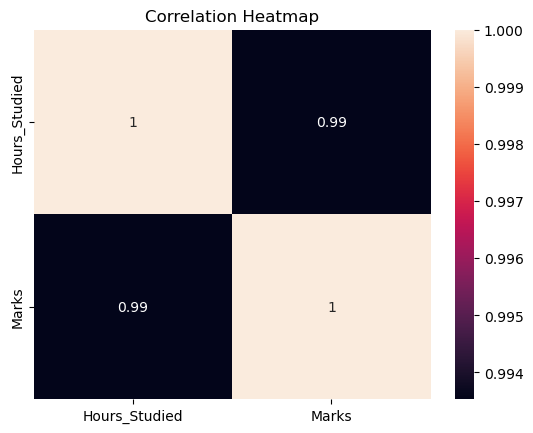

In [9]:
plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

### Regression Analysis (Simple Linear Regression):


In [10]:
# Define X and Y
X = df[['Hours_Studied']]
y = df['Marks']

In [12]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Model Parameters:
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Intercept: 28.80000000000001
Slope: 4.324999999999999


### Regression Equation:
*     Marks=Intercept+(Slope×Hours_Studied)

In [15]:
# Prediction:
y_pred = model.predict(X_test)

comparison = pd.DataFrame({
    'Actual Marks': y_test,
    'Predicted Marks': y_pred
})
comparison


,Actual Marks,Predicted Marks
1,45,46.1
5,85,80.7


In [16]:
# Model Evaluation:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 9.849999999999998
R-squared: 0.975375


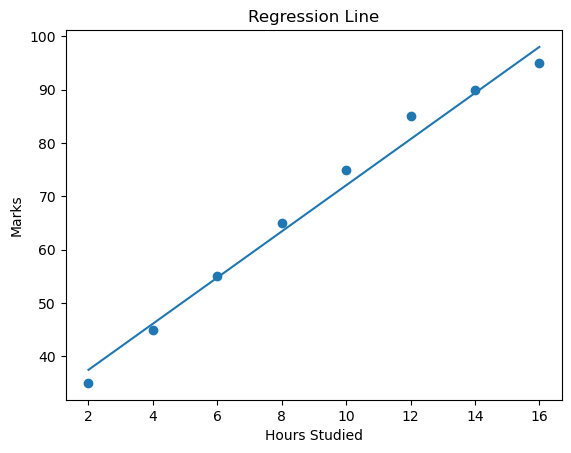

In [17]:
# Regression Line Visualization:
plt.figure()
plt.scatter(X, y)
plt.plot(X, model.predict(X), linestyle='-')
plt.xlabel("Hours Studied")
plt.ylabel("Marks")
plt.title("Regression Line")
plt.show()

# Conclusion (For Project)
print("""
Conclusion:
There is a strong positive correlation between Hours Studied and Marks.
The regression model shows that marks increase as study hours increase.
R-squared value indicates good model performance.
""")